In [1]:
from keras import backend as K
K.clear_session()
%reset out

/home/cvblab03/.virtualenvs/andresEnv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Flushing output cache (0 entries)


In [2]:
from keras.models import Model
from keras.models import model_from_json
import numpy as np
import os
import cv2
from PIL import Image
import glob
import matplotlib.pyplot as plt
from load_dataset import load_dataset

In [3]:
class feature_extractor:
    def __init__(self, model_path, model_name, model_weights, img_width, img_height, root_imgs, print_mdl ):
        self.model_path = model_path
        self.model_name = model_name
        self.model_weights = model_weights
        self.img_width = img_width
        self.img_height = img_height
        #self.list_imgs = glob.glob(root_imgs)
        
        self.my_gen = load_dataset(root_imgs, self.img_width, self.img_height, 3, batch_size=16)
        
        # load json of the model
        json_file = open(os.path.join(self.model_path, self.model_name), 'r')
        loaded_model_json = json_file.read()
        json_file.close()

        # create the model
        self.model = model_from_json(loaded_model_json)
        if print_mdl:
            print(self.model.summary())

        # load the weights
        self.model.load_weights(os.path.join(self.model_path, self.model_weights))
        

            
    def extract_features(self, layer):            

        model_extractFeatures = Model(outputs=self.model.get_layer(layer).output, inputs=self.model.input )
        gen = self.my_gen.data2predict()
        features = model_extractFeatures.predict_generator(gen, steps=10)
        return features
        
        

In [4]:
model_path = '/home/cvblab03/Documents/fine-tuning_Chen/ModelsByFold_Chen/Chen/Fold0/'
#model_path = 'modelResNet50/'
model_name = 'Fold_0model.json'
model_weights = 'Fold_0Chen_Model_Batch8final_weights.h5'
img_width = 256
img_height = 256
root_imgs = 'croppedMESSIDOR/*'

In [5]:
# Declaring the object
extractor = feature_extractor(model_path, model_name, model_weights, img_width, img_height, root_imgs, print_mdl=False )

In [6]:
# Extracting the features
featsC1 = extractor.extract_features('dense_1')

In [72]:
featsC2 = extractor.extract_features('res2b_branch2b')

In [73]:
featsC3 = extractor.extract_features('bn2c_branch2a')

In [74]:
featsC4 = extractor.extract_features('res3a_branch2b')

In [75]:
K.clear_session()

In [24]:
print(featsC1.shape)
#print(np.arange(0,featsC1.shape[1],1))

(160, 512)


/home/cvblab03/.virtualenvs/andresEnv/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


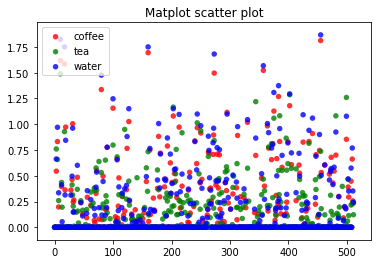

In [26]:
x = np.arange(0,featsC1.shape[1],1)
g1 = (x, featsC1[3,:])
g2 = (x, featsC1[4,:])
g3 = (x, featsC1[5,:])
 
data = (g1, g2, g3)
colors = ("red", "green", "blue")
groups = ("coffee", "tea", "water") 
 
# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
 
for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
 
plt.title('Matplot scatter plot')
plt.legend(loc=2)
plt.show()

(112, 112)


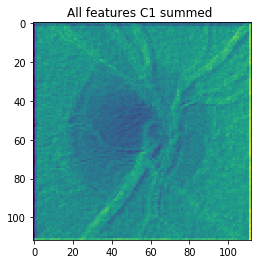

In [77]:
allFe = np.sum(featsC1[1,:,:,:], axis=2)
print(allFe.shape)
plt.title('All features C1 summed ')
plt.imshow(allFe)

(55, 55)


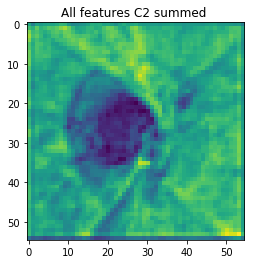

In [78]:
allFe = np.sum(featsC2[1,:,:,:], axis=2)
print(allFe.shape)
plt.title('All features C2 summed ')
plt.imshow(allFe)

(55, 55)


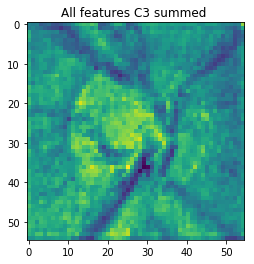

In [79]:
allFe = np.sum(featsC3[1,:,:,:], axis=2)
print(allFe.shape)
plt.title('All features C3 summed ')
plt.imshow(allFe)

(28, 28)


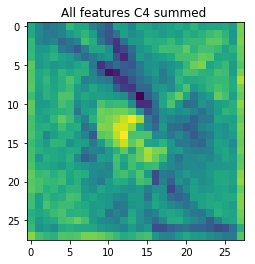

In [80]:
allFe = np.sum(featsC4[1,:,:,:], axis=2)
print(allFe.shape)
plt.title('All features C4 summed ')
plt.imshow(allFe)